<a href="https://colab.research.google.com/github/ksmooi/ai_power/blob/main/notebooks/student_performance_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Content

A) [Problem Description](#scrollTo=nyEsK17AKLxP)

B) [EDA Procedure](#scrollTo=lw3jlEzgvjsR)

C) [Model Building and Training](#scrollTo=PU8-pc0c5LG6)

D) [Analyze Results](#scrollTo=wOrlTvgc-3IQ)

E) [Conclusion](#scrollTo=6cjJFEyJJZr5)

F) [Reference](#scrollTo=Ru5vlaHRN2yA)

## A) Problem Description

The primary problem being addressed is to accurately predict student performance (final grades) using a variety of academic and personal factors. Predicting student performance can help in several ways:

1. **Identifying At-Risk Students**:
   - By accurately predicting which students are likely to perform poorly, educators and administrators can intervene early to provide additional support and resources to those who need it most.

2. **Resource Allocation**:
   - Schools can allocate resources more effectively by understanding which factors most strongly influence student performance. For example, if absenteeism is a significant predictor of poor performance, schools can invest in programs to improve attendance.

3. **Personalized Education Plans**:
   - Predictive models can help create personalized education plans tailored to individual student needs, ensuring that each student receives the appropriate level of challenge and support.

4. **Policy Making**:
   - Data-driven insights from predictive models can inform policy decisions at the school or district level, such as implementing new educational programs or modifying existing ones.

5. **Parental Engagement**:
   - Understanding the factors that influence student performance can help engage parents more effectively in their children's education. Schools can provide targeted advice to parents on how they can support their children's academic success.


## EDA Procedure

### B1: Import Libraries
Start by importing the necessary libraries for data manipulation, visualization, and analysis.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visualisation style
plt.style.use('ggplot')
sns.set(style='whitegrid')

# Display all columns of the DataFrame
pd.set_option('display.max_columns', None)

### B2: Load the Dataset

This table provides a structured overview of the dataset, highlighting the different categories of information and the values each feature can take. Dataset contains 649 rows and 33 columns.

This structured approach helps in understanding the dataset and planning further analysis or predictive modeling tasks.

| **Category**              | **Feature Name** | **Description**                                                                                          | **Values**                           |
|---------------------------|------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------|
| **Demographic Information** | `school`          | Student's school                                                                                          | GP (Gabriel Pereira), MS (Mousinho da Silveira) |
|                           | `sex`             | Student's sex                                                                                            | F (Female), M (Male)                |
|                           | `age`             | Student's age                                                                                            | 15 to 22                             |
|                           | `address`         | Student's home address type                                                                              | U (Urban), R (Rural)                |
| **Family Information**    | `famsize`         | Family size                                                                                               | LE3 (<=3), GT3 (>3)                 |
|                           | `Pstatus`         | Parent's cohabitation status                                                                              | T (Together), A (Apart)             |
|                           | `Medu`            | Mother's education level                                                                                  | 0 (None), 1 (Primary), 2 (5th to 9th grade), 3 (Secondary), 4 (Higher) |
|                           | `Fedu`            | Father's education level                                                                                  | 0 (None), 1 (Primary), 2 (5th to 9th grade), 3 (Secondary), 4 (Higher) |
|                           | `Mjob`            | Mother's job                                                                                              | teacher, health, services, at_home, other |
|                           | `Fjob`            | Father's job                                                                                              | teacher, health, services, at_home, other |
|                           | `guardian`        | Student's guardian                                                                                       | mother, father, other               |
| **Reason for School Choice** | `reason`          | Reason to choose this school                                                                             | home, reputation, course, other     |
| **Study and Support Information** | `traveltime`      | Home to school travel time                                                                               | 1 (<15 min), 2 (15 to 30 min), 3 (30 min to 1 hour), 4 (>1 hour) |
|                           | `studytime`       | Weekly study time                                                                                        | 1 (<2 hours), 2 (2 to 5 hours), 3 (5 to 10 hours), 4 (>10 hours) |
|                           | `failures`        | Number of past class failures                                                                            | 0 to 4                              |
|                           | `schoolsup`       | Extra educational support                                                                                | yes, no                             |
|                           | `famsup`          | Family educational support                                                                               | yes, no                             |
|                           | `paid`            | Extra paid classes within the course subject                                                             | yes, no                             |
|                           | `activities`      | Extra-curricular activities                                                                              | yes, no                             |
|                           | `nursery`         | Attended nursery school                                                                                  | yes, no                             |
|                           | `higher`          | Wants to take higher education                                                                           | yes, no                             |
|                           | `internet`        | Internet access at home                                                                                  | yes, no                             |
|                           | `romantic`        | With a romantic relationship                                                                             | yes, no                             |
| **Personal Information**  | `famrel`          | Quality of family relationships                                                                          | 1 (very bad) to 5 (excellent)       |
|                           | `freetime`        | Free time after school                                                                                   | 1 (very low) to 5 (very high)       |
|                           | `goout`           | Going out with friends                                                                                   | 1 (very low) to 5 (very high)       |
|                           | `Dalc`            | Workday alcohol consumption                                                                              | 1 (very low) to 5 (very high)       |
|                           | `Walc`            | Weekend alcohol consumption                                                                              | 1 (very low) to 5 (very high)       |
|                           | `health`          | Current health status                                                                                     | 1 (very bad) to 5 (very good)       |
|                           | `absences`        | Number of school absences                                                                                | 0 to 93                             |
| **Grades**                | `G1`              | First period grade                                                                                       | 0 to 20                             |
|                           | `G2`              | Second period grade                                                                                      | 0 to 20                             |
|                           | `G3`              | Final grade (output target)                                                                              | 0 to 20                             |


Load the dataset into a pandas DataFrame.

In [57]:
# Load the dataset
file_path = 'data/student_por.csv'
df = pd.read_csv(file_path)

# Show the data size
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

# Display the first few rows of the dataset
df.head()

Dataset contains 649 rows and 33 columns.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


### B3: Basic Data Inspection
Check the basic structure of the dataset, including data types, missing values, and summary statistics.

In [58]:
# Display basic information about the dataset
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### B4: Data Cleaning

Cleaning the dataset is crucial for data preparation. Handling missing values ensures data completeness, preventing distortion in analysis and improving model predictions. Filling missing values with the median maintains data distribution without bias.

Encoding categorical variables into numerical form is essential, as machine learning algorithms require numerical input. Removing duplicate rows prevents redundancy, ensuring data quality and avoiding overfitting. This ensures balanced and accurate predictions, making the dataset clean, consistent, and ready for effective machine learning modeling.

In [59]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Check for missing values
df.isnull().sum()

# Handle missing values by filling with median for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display the first few rows of the cleaned dataset
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


### B5: Visualize the Distribution of Numerical Features
Plot the distribution of numerical features to understand their distribution and identify any potential outliers.

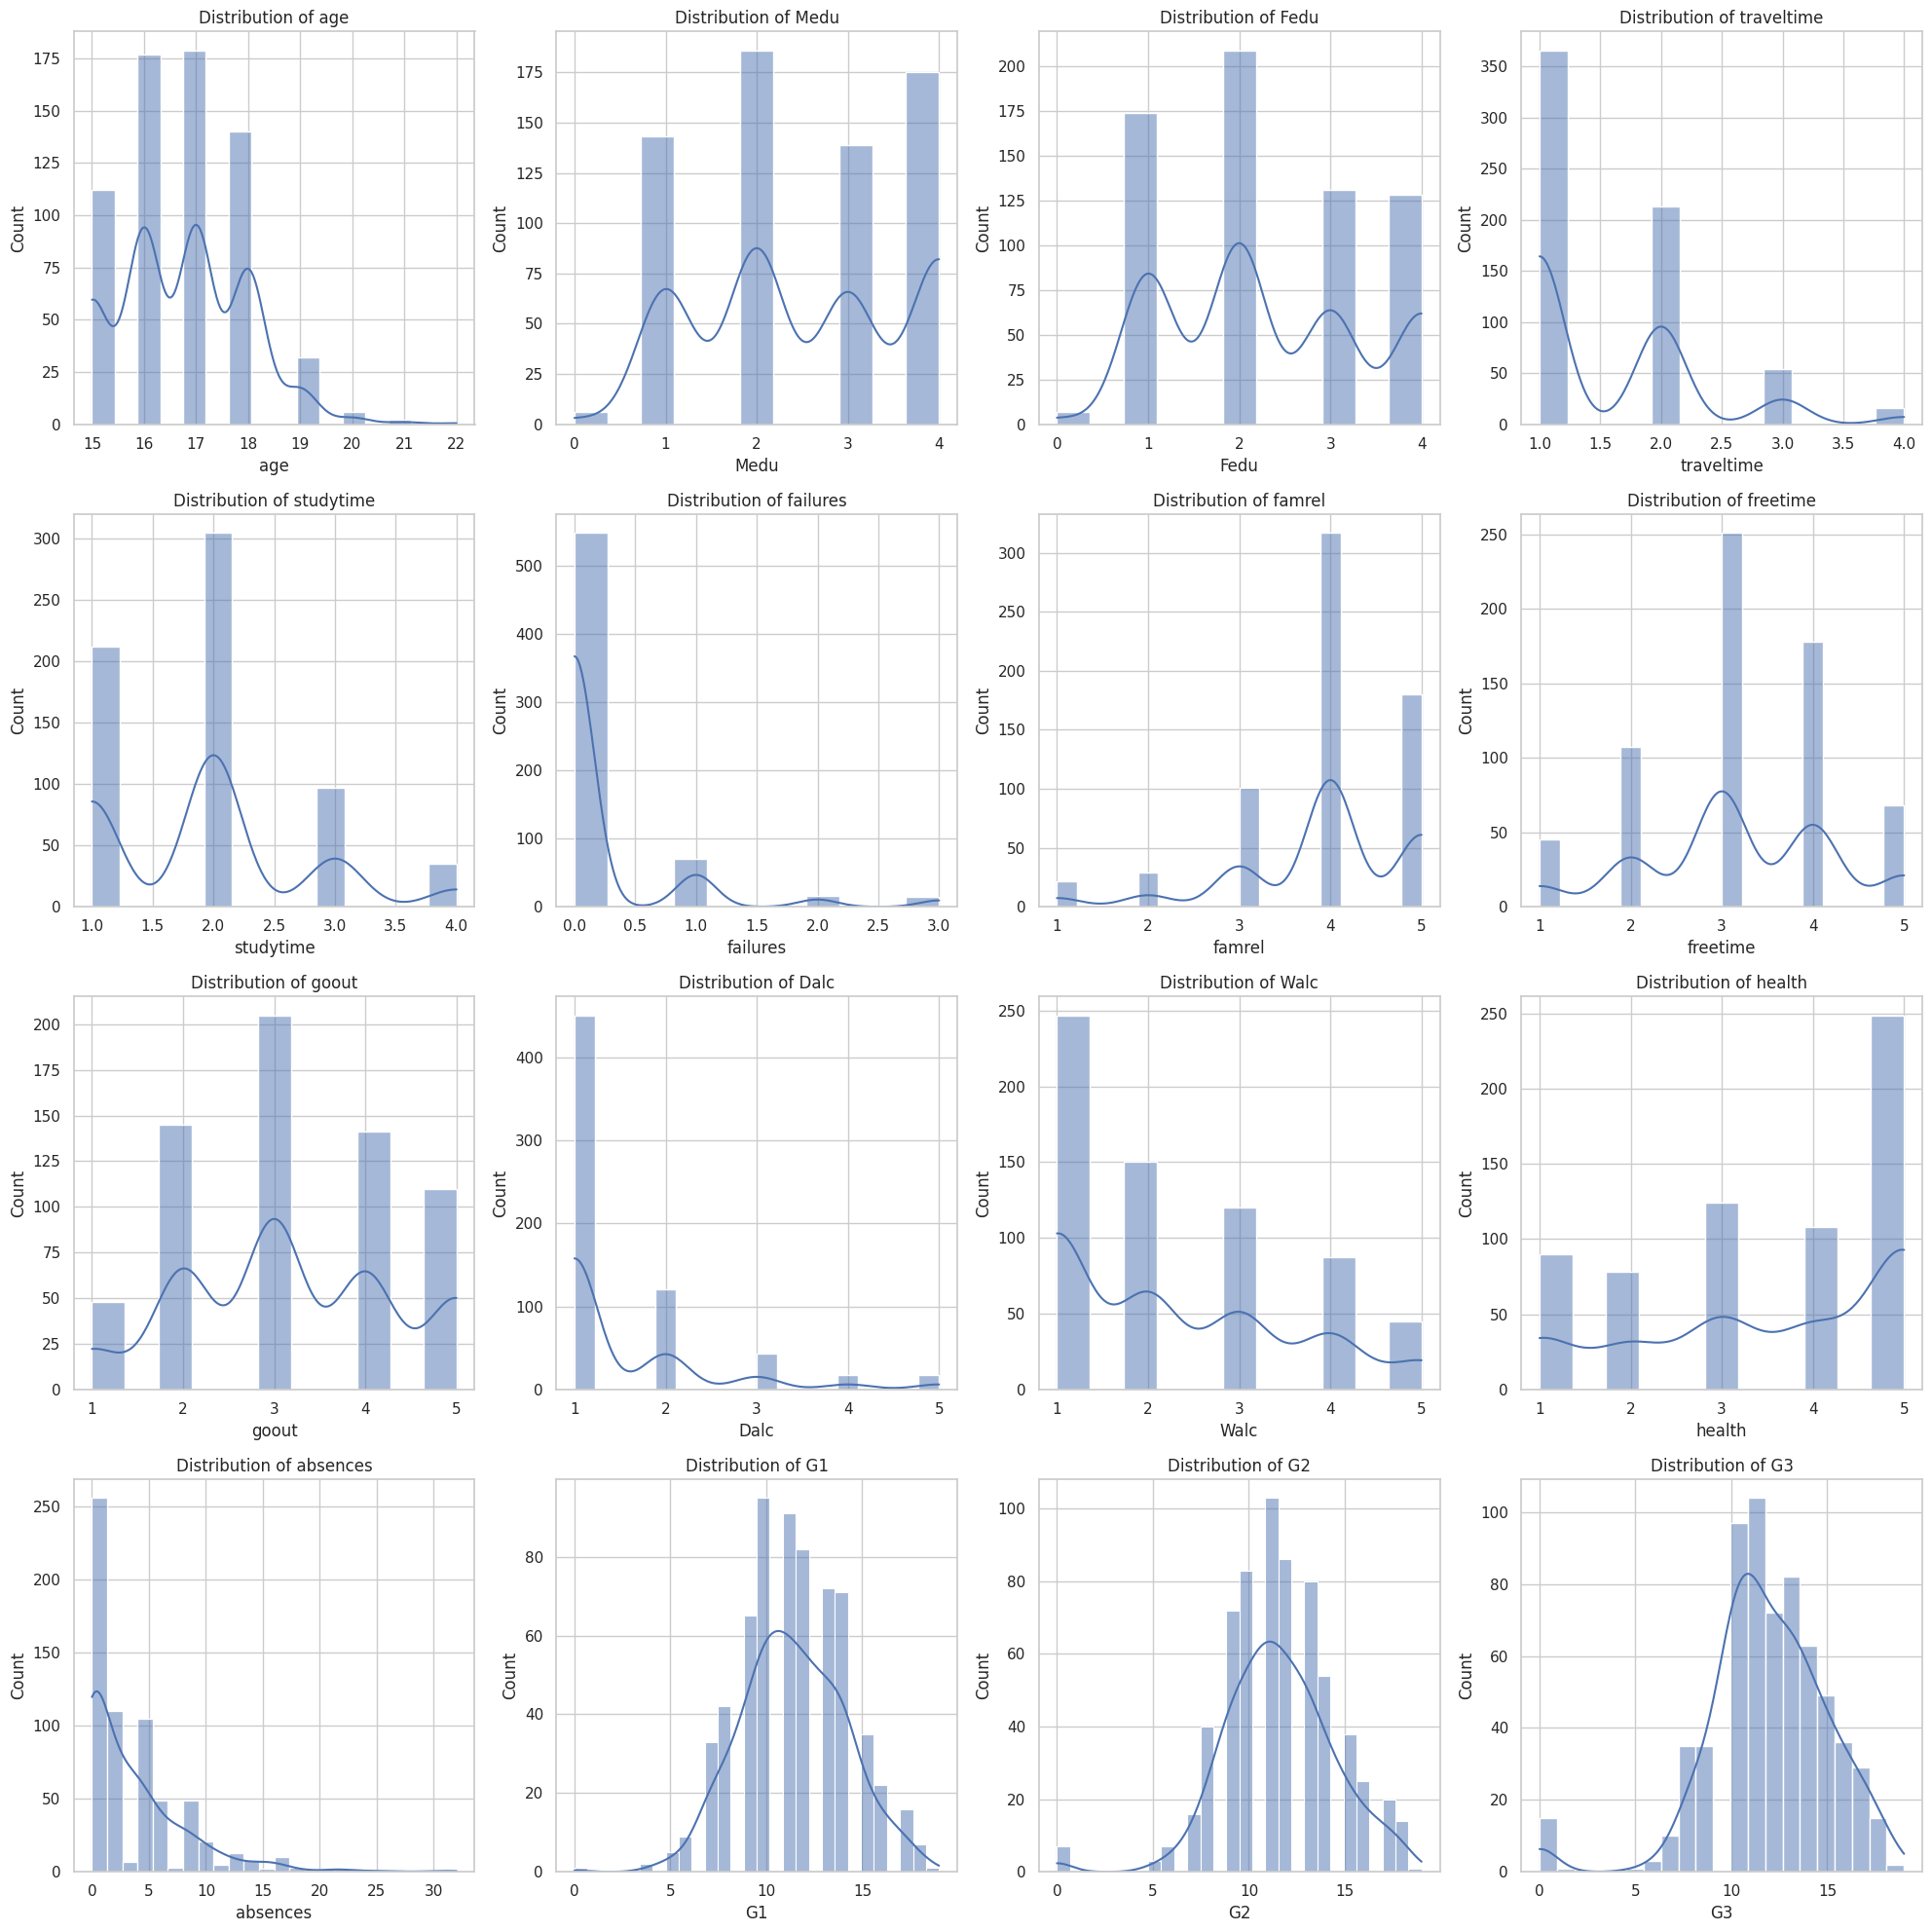

In [60]:
# Define the numerical features
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Plot histograms for numerical features using Seaborn
plt.figure(figsize=(20, 20))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### B6: Visualize Categorical Features
Plot the distribution of categorical features to understand their frequency distribution.

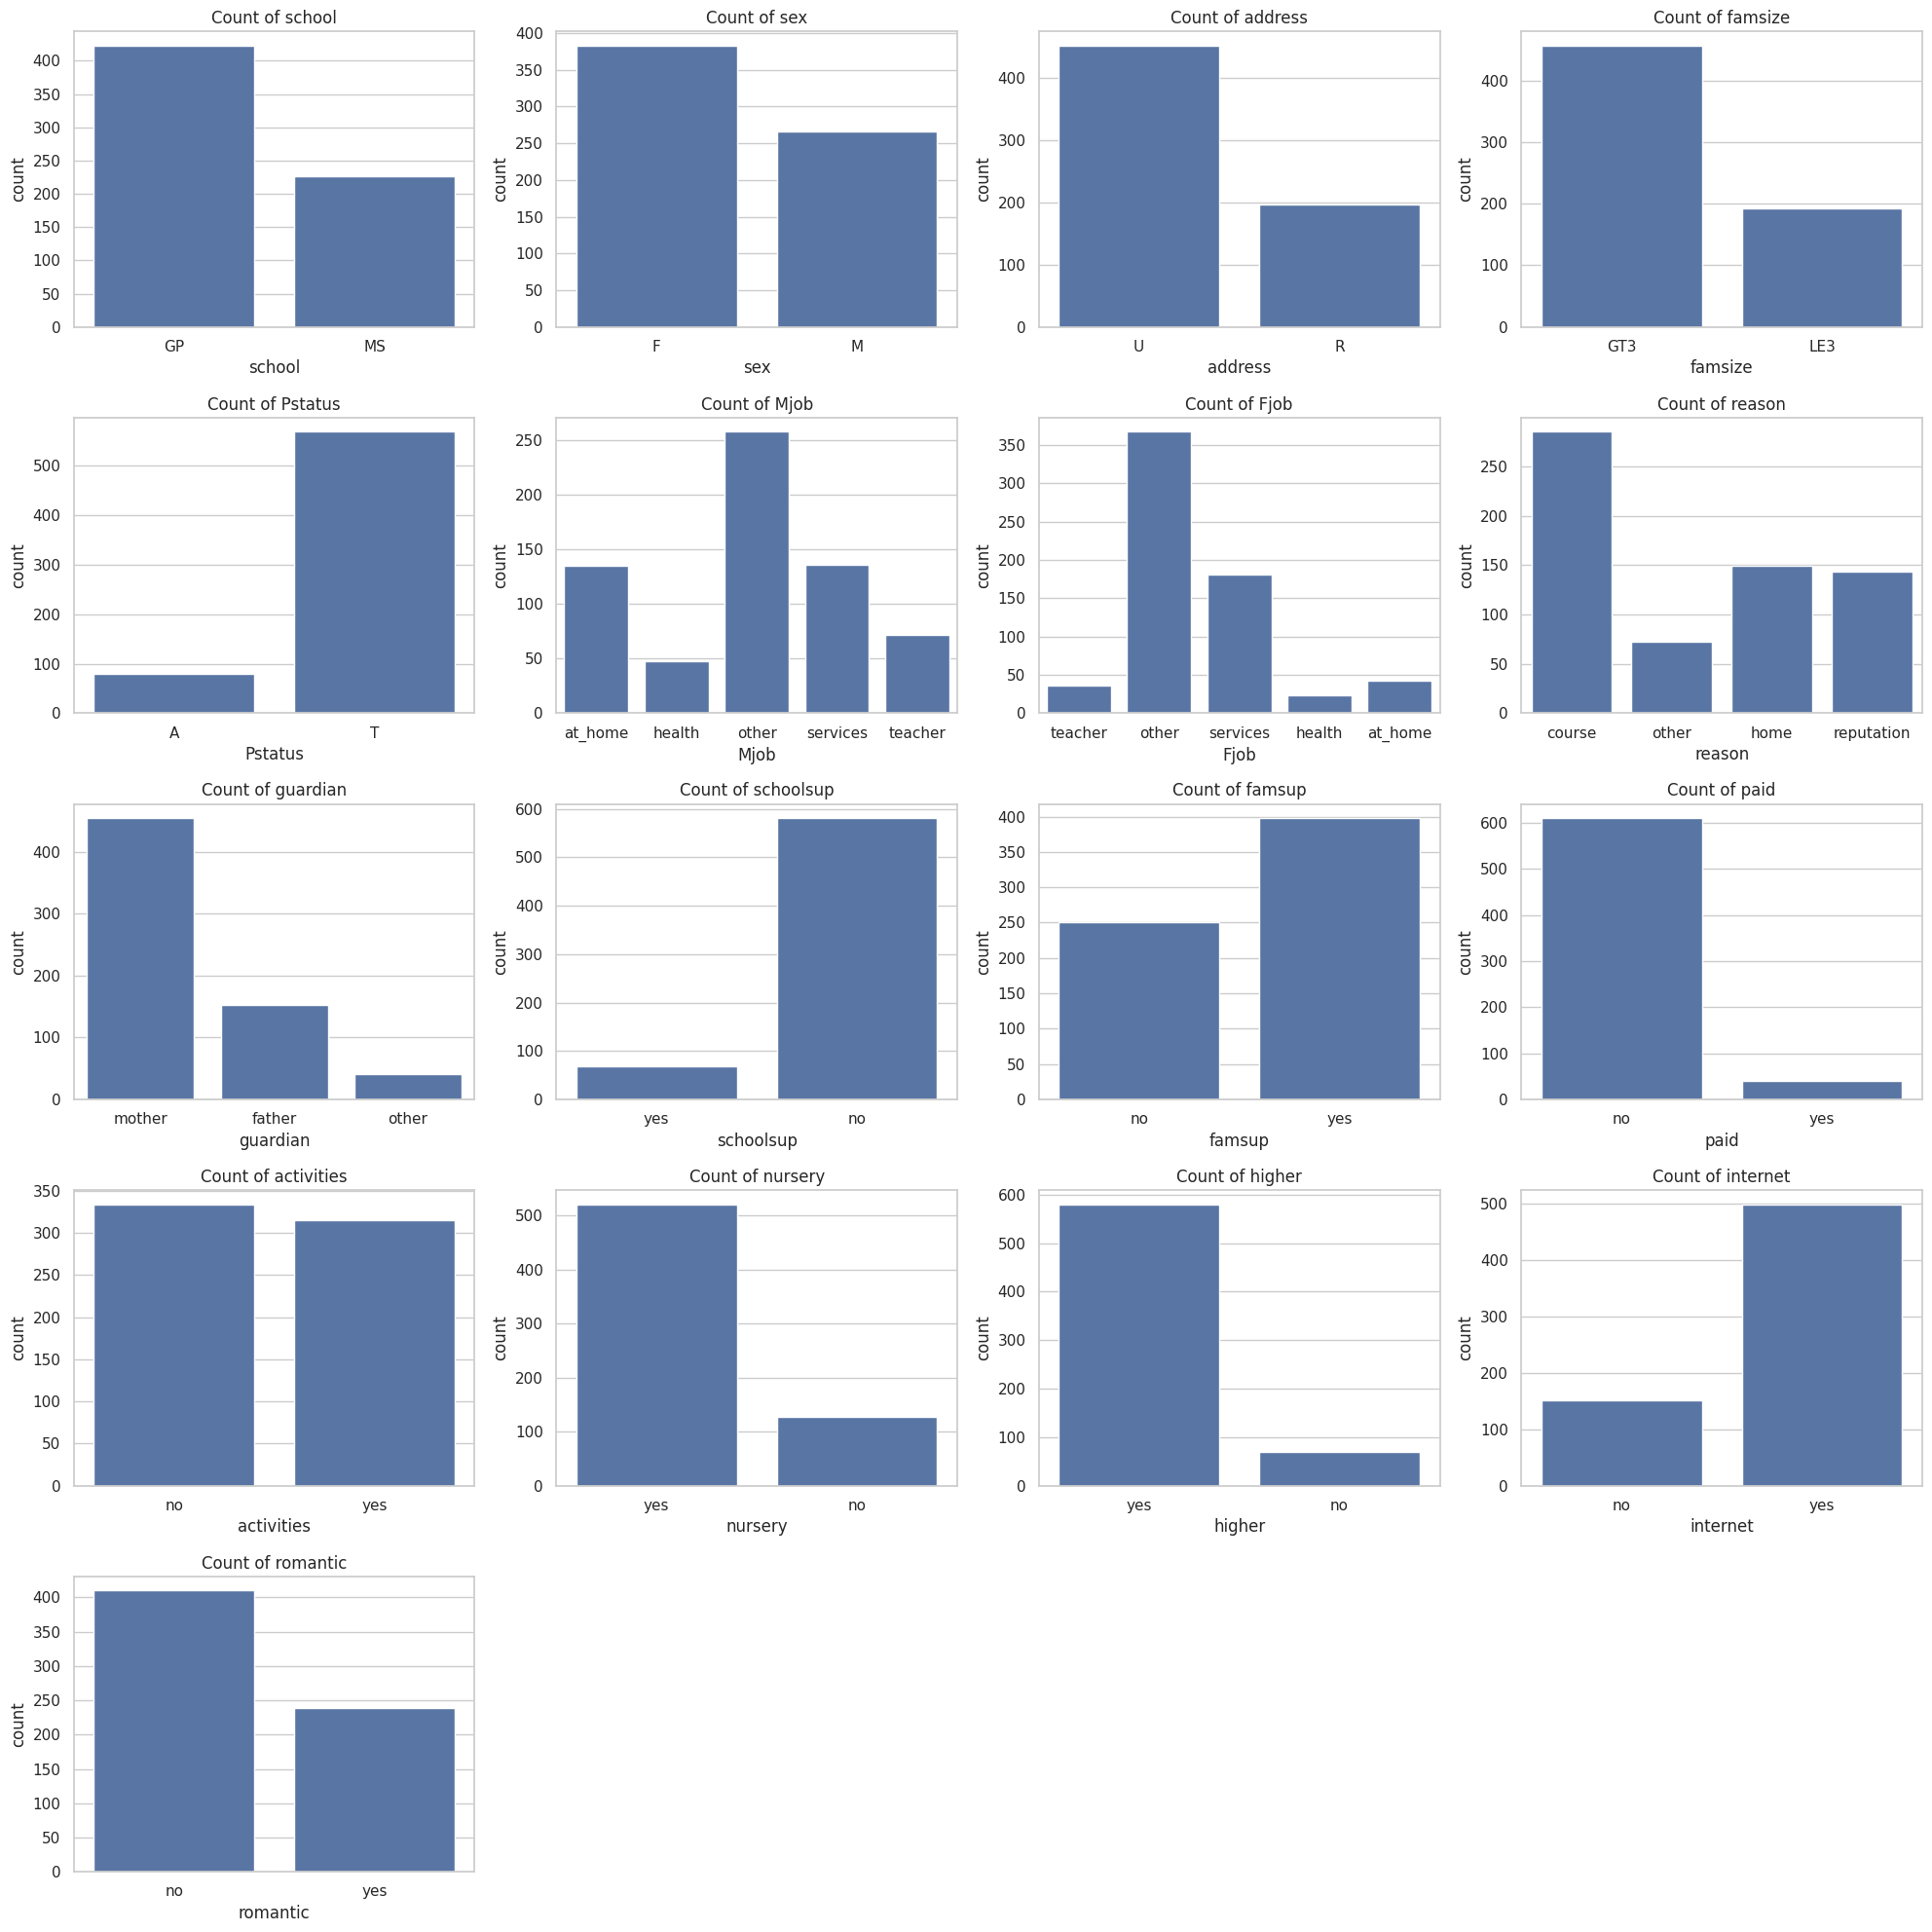

In [61]:
# Plot bar plots for categorical features using seaborn
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Set up the matplotlib figure
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot bar plots
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {feature}')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### B7: Correlation Analysis
Analyze the correlation between numerical features and visualize the correlation matrix.

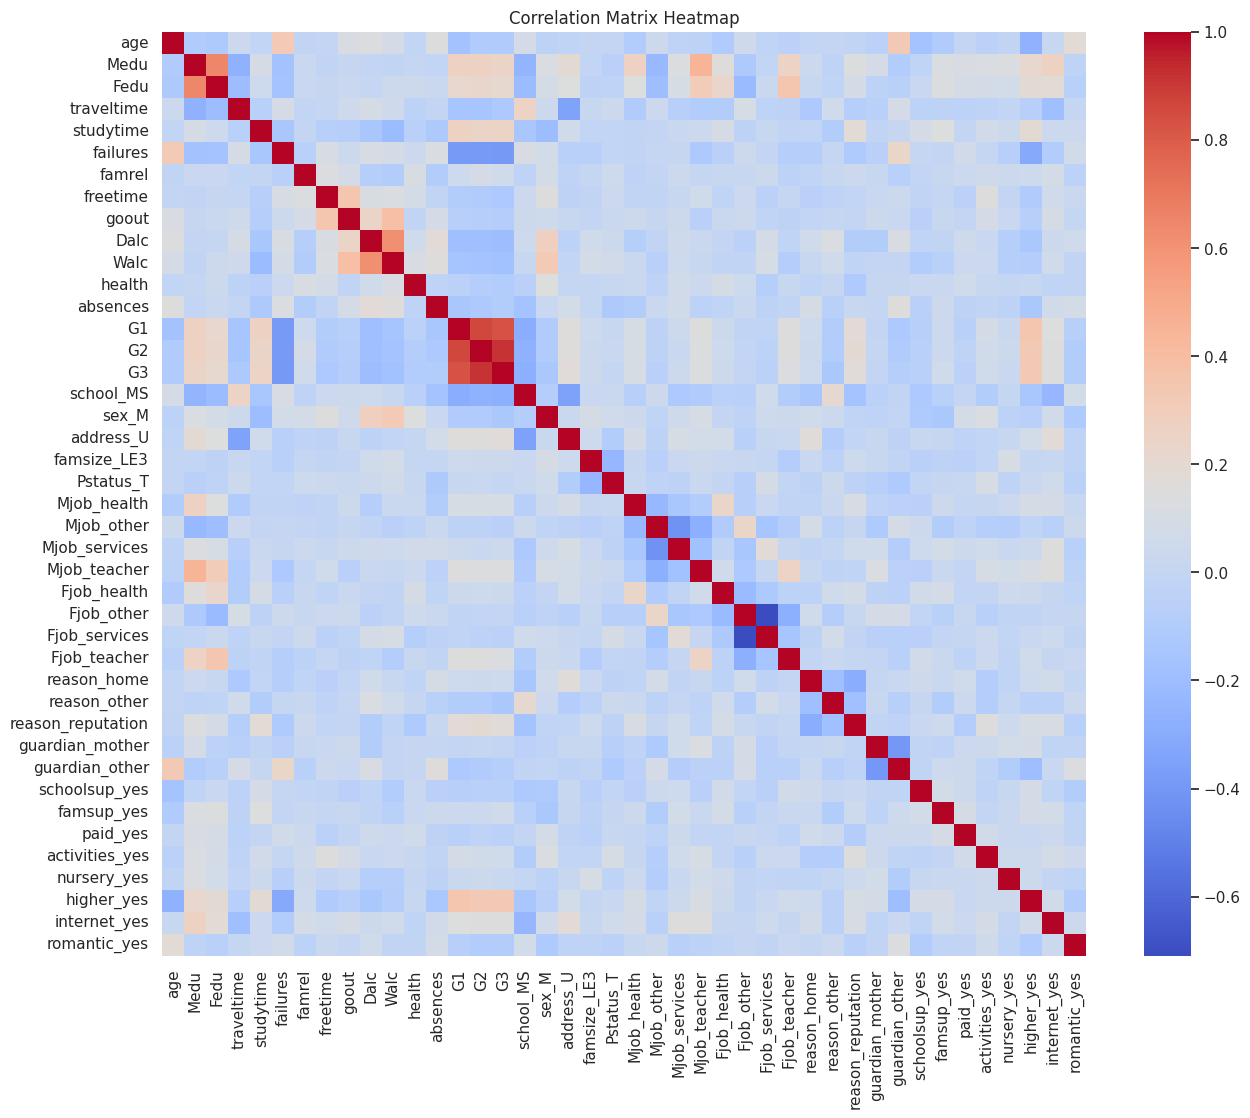

In [62]:
# Encode categorical variables using get_dummies
encoded_data = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the heatmap of the correlation matrix with improved readability
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### B8: Analyze Relationships between Features
Explore relationships between pairs of features, especially those that may be important for the target variable G3.

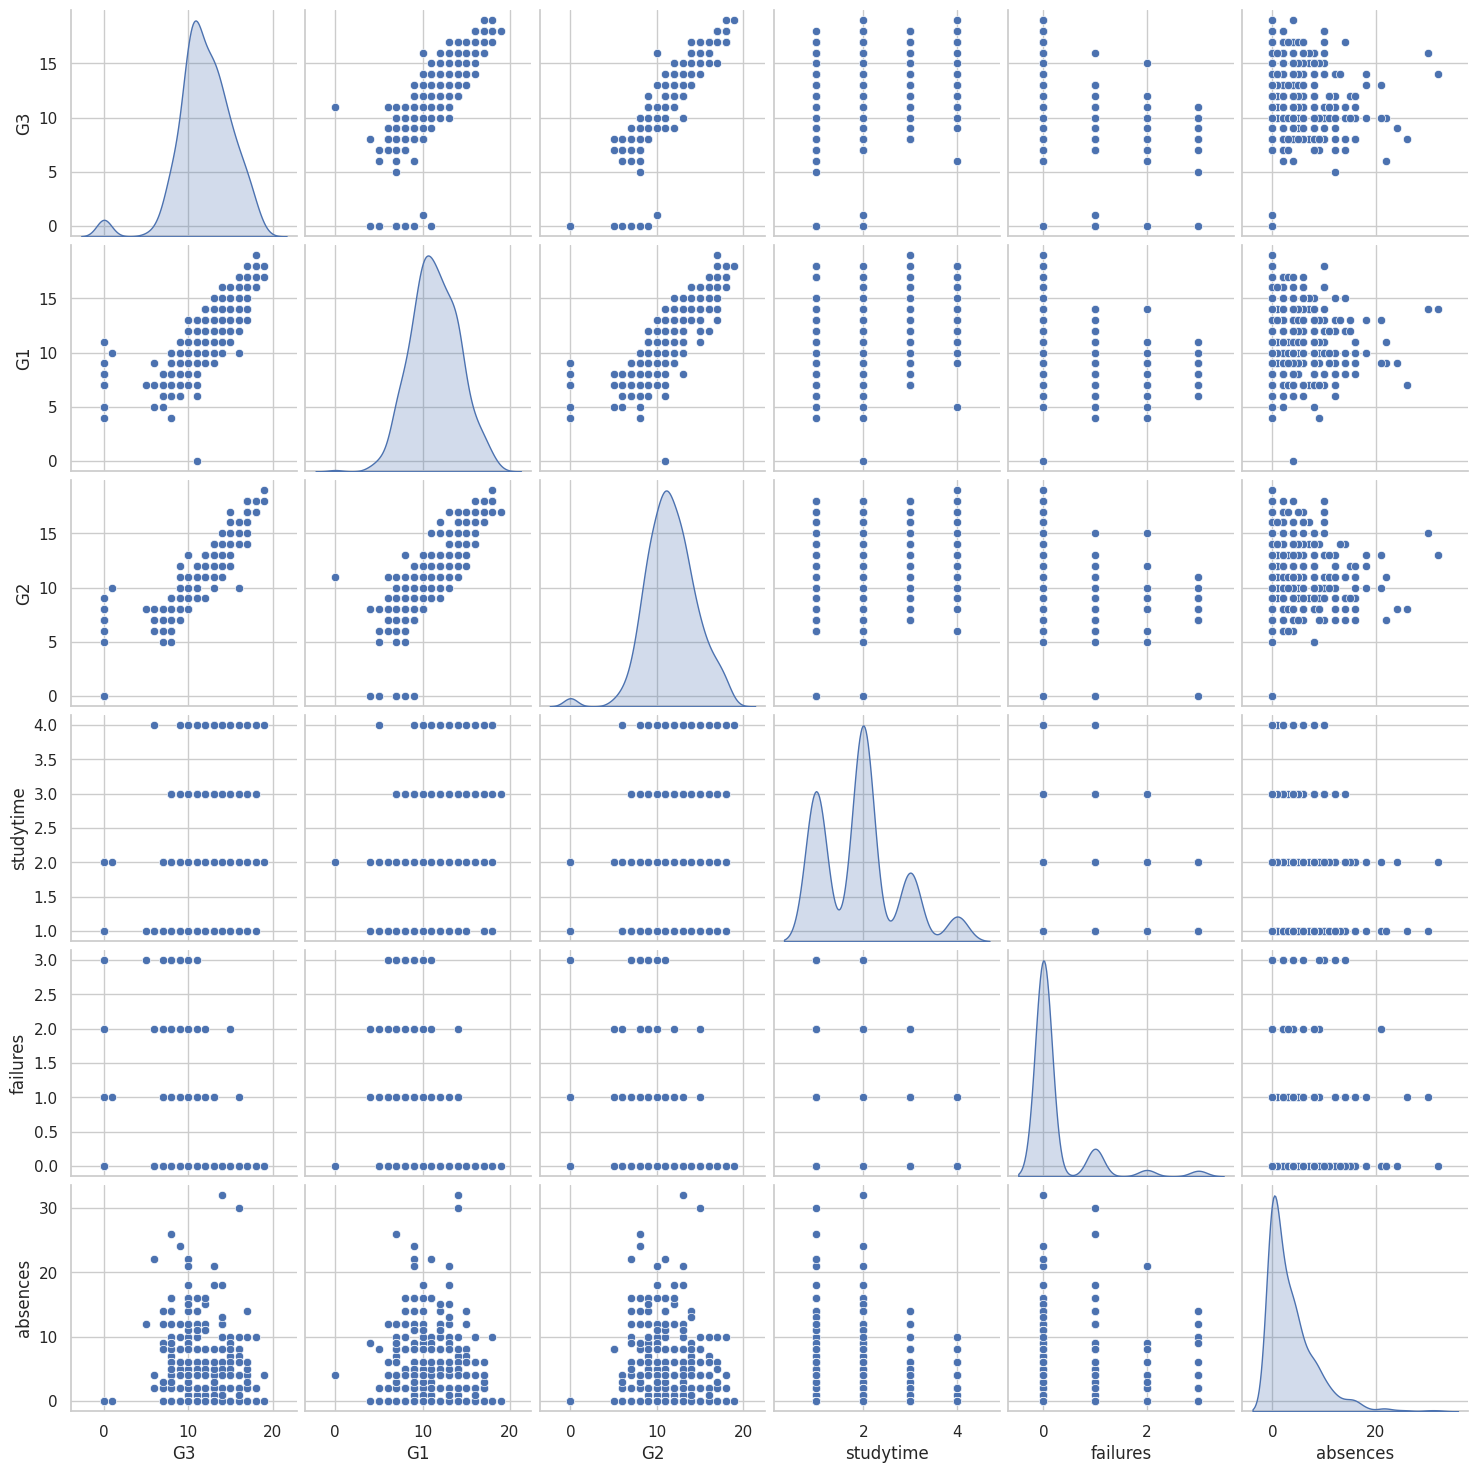

<Figure size 1500x1200 with 0 Axes>

In [63]:
# Pairplot for selected features
selected_features = ['G3', 'G1', 'G2', 'studytime', 'failures', 'absences']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.figure(figsize=(15, 12))
plt.show()

### B9: Feature Relationships with Target Variable
Visualize how different features affect the target variable G3.

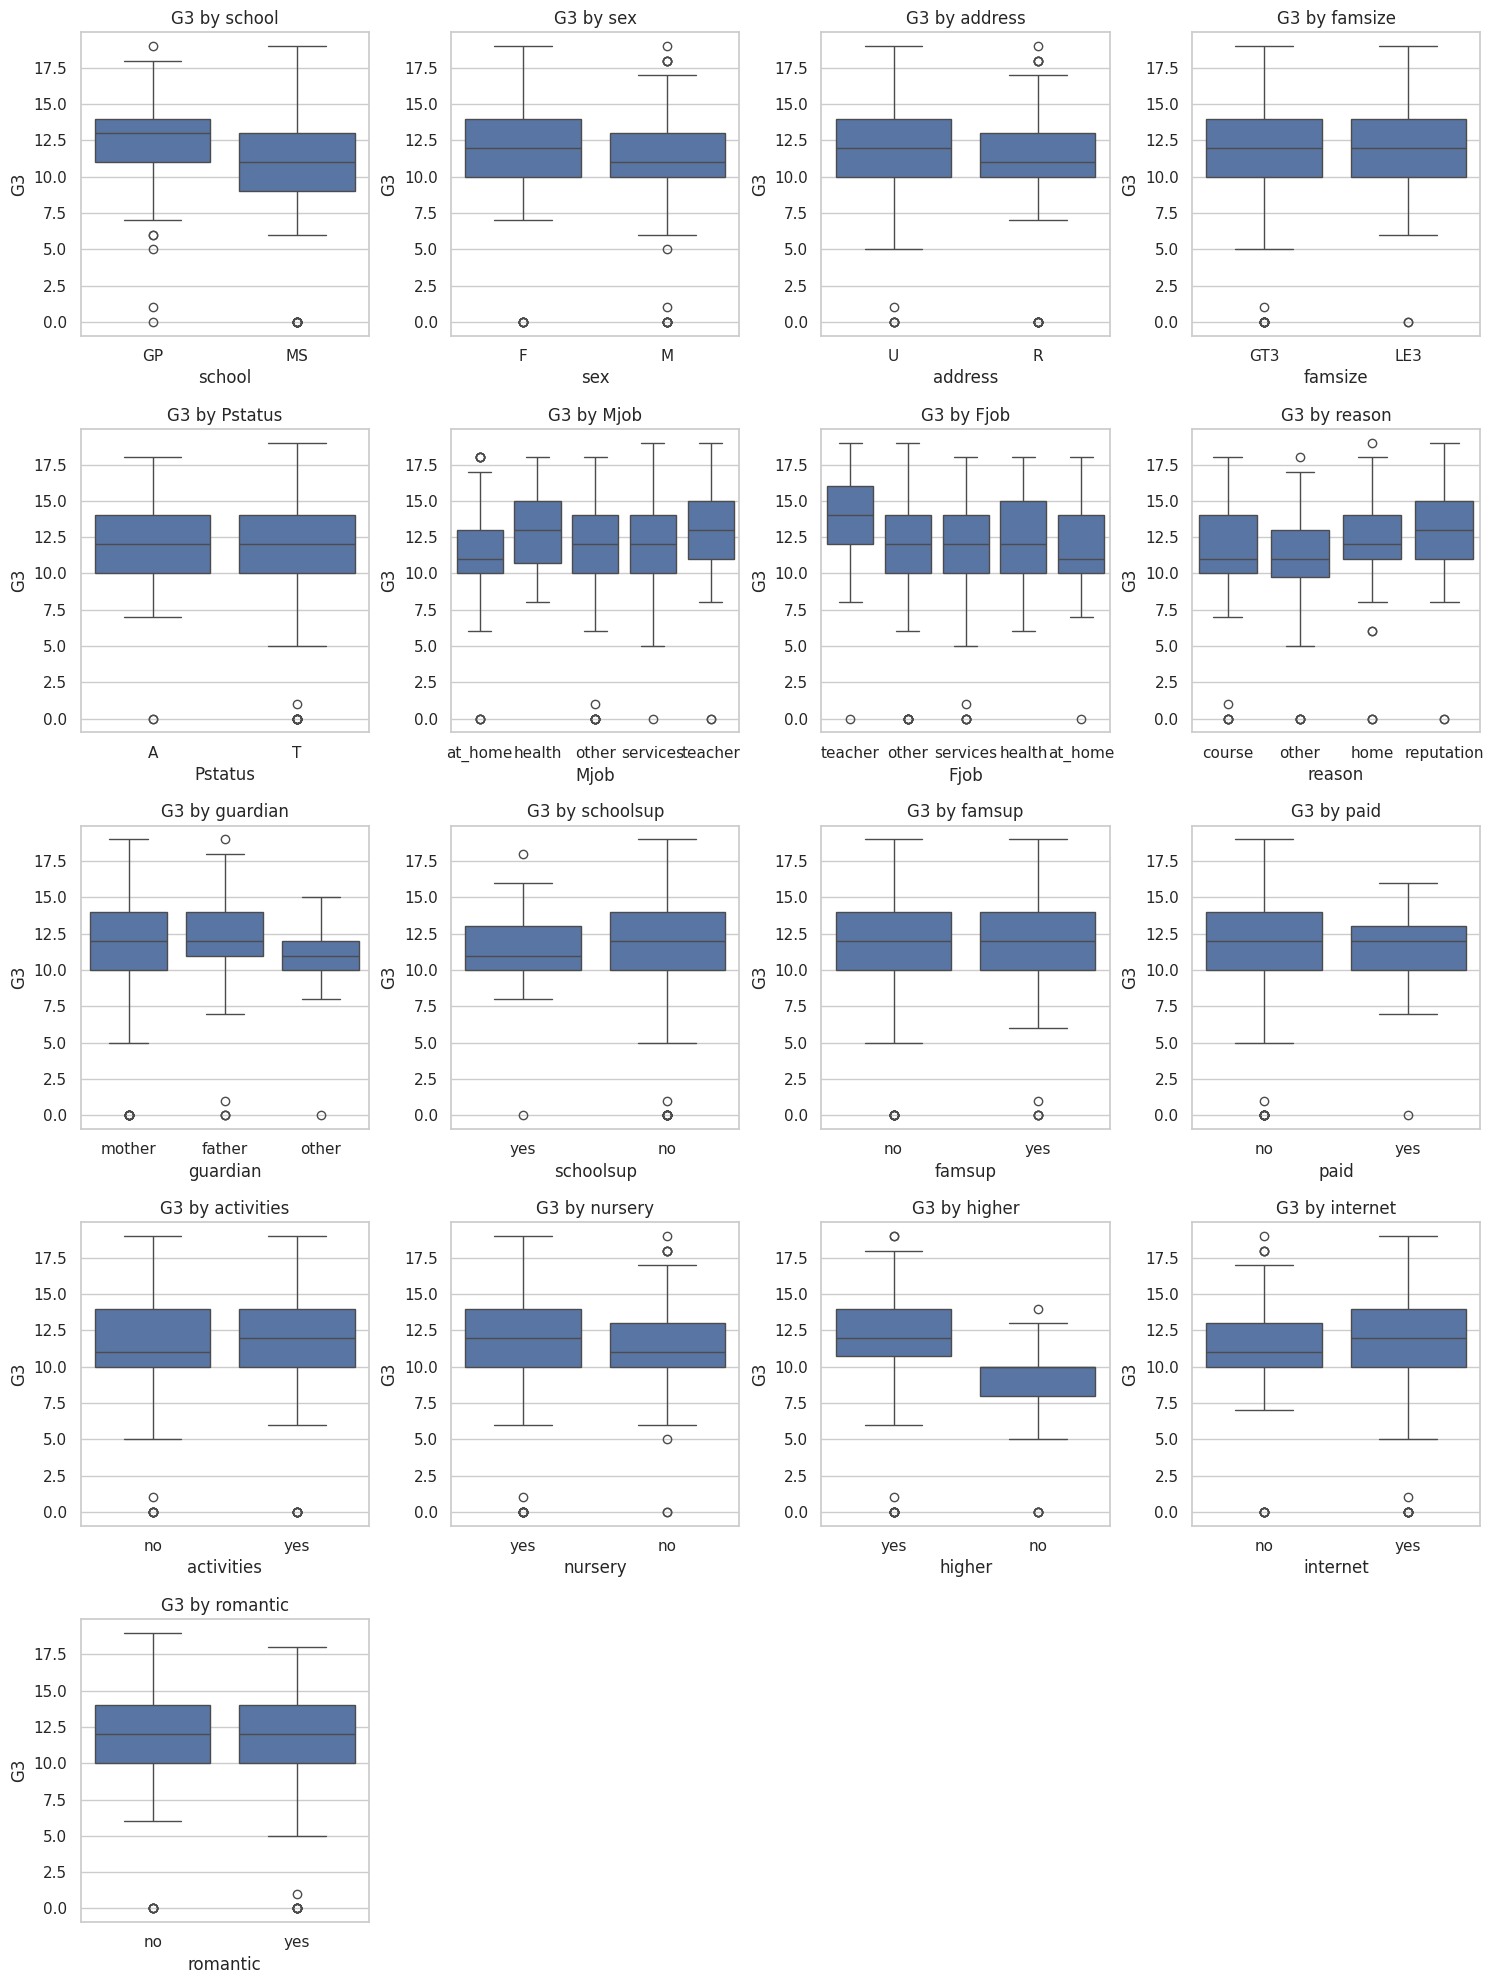

In [64]:
# Box plots to visualize the relationship between categorical features and the target variable
fig, axes = plt.subplots(5, 4, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='G3', data=df, ax=axes[i])
    axes[i].set_title(f'G3 by {feature}')

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### B10) Feature Selection

#### 1. High Correlation with Target Variable (G3)
First, identify features that have a strong correlation with the target variable `G3`. Generally, a correlation coefficient (absolute value) greater than 0.3 is considered moderate, and greater than 0.5 is considered strong.

#### 2. Low Correlation with Each Other
Choose features that are not highly correlated with each other to avoid multicollinearity, which can make it difficult for the model to determine the individual effect of each feature.

#### Recommended Features Based on Correlation Analysis

##### Numerical Features:
1. **Strong Correlation with G3**:
   - `G1`: 0.84
   - `G2`: 0.90

2. **Moderate Correlation with G3**:
   - `failures`: -0.39
   - `Medu`: 0.20
   - `Fedu`: 0.18
   - `studytime`: 0.16

3. **Low Correlation with G3**:
   - `absences`: -0.08
   - `schoolsup_yes`: -0.09
   - `higher_yes`: 0.10
   - `internet_yes`: 0.13

#### Recommended Features Based on Pair Plots

1. **G1**: First period grade - strong positive correlation with `G3`
2. **G2**: Second period grade - strong positive correlation with `G3`
3. **failures**: Number of past class failures - moderate negative correlation with `G3`
4. **studytime**: Weekly study time - slight positive correlation with `G3`
5. **absences**: Number of school absences - although the correlation is weak, it can still be considered for completeness

#### Recommended Features Based on Box Plots

1. **School (`school`)**: There is some difference in grades based on the school.
2. **Mother's Job (`Mjob`)**: Slight variations based on job type might contribute to the model.
3. **Father's Job (`Fjob`)**: Similar to the mother's job, slight variations can be considered.
4. **Reason for Choosing the School (`reason`)**: Students who chose the school for its reputation tend to have higher grades.
5. **School Support (`schoolsup`)**: Extra school support seems to correlate with lower grades.
6. **Higher Education Aspiration (`higher`)**: Students who want higher education tend to have higher grades.

#### Summary of Recommended Features

##### Numerical Features:
- `G1` (First period grade)
- `G2` (Second period grade)
- `failures` (Number of past class failures)
- `studytime` (Weekly study time)
- `Medu` (Mother's education)
- `Fedu` (Father's education)
- `absences` (Number of school absences)

##### Categorical Features:
- `school` (Student's school)
- `Mjob` (Mother's job)
- `Fjob` (Father's job)
- `reason` (Reason for choosing the school)
- `schoolsup` (School support)
- `higher` (Higher education aspiration)

## C) Model Building and Training

In this section, we will build and train various machine learning models to predict student performance based on the dataset. We will use the `StudentPerformanceAnalyzer` class to streamline the process of data preprocessing, model training, evaluation, and comparison.

### C1: Introduce the StudentPerformanceAnalyzer Class

The `StudentPerformanceAnalyzer` class is designed to facilitate the analysis of student performance data using various machine learning algorithms. It includes methods for data preprocessing, model training, evaluation, and visualization of results.

#### Source Code of StudentPerformanceAnalyzer

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

class StudentPerformanceAnalyzer:
    """
    A class to analyze student performance using various machine learning models.

    Attributes:
    data: A pandas DataFrame containing the dataset.
    models: A dictionary of machine learning models to be trained and evaluated.
    results: A dictionary to store the evaluation results of the models.
    X: Features for training and testing.
    y: Target variable for training and testing.
    X_train: Training set features.
    X_test: Testing set features.
    y_train: Training set target.
    y_test: Testing set target.
    """

    def __init__(self, data_path):
        """
        Initializes the StudentPerformanceAnalyzer with the dataset and models.

        Parameters:
        data_path: str, the path to the dataset file.
        """
        self.data = pd.read_csv(data_path)
        self.models = {
            'Logistic Regression': LogisticRegression(max_iter=200),
            'Decision Tree Classifier': DecisionTreeClassifier(max_depth=10, min_samples_split=20),
            'Support Vector Machine': SVC(C=1.0, kernel='rbf', gamma='scale'),
            'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
            'AdaBoost Classifier': AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
            'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
            'K Neighbors Classifier': KNeighborsClassifier(n_neighbors=5, algorithm='auto'),
            'Gaussian Naive Bayes': GaussianNB(var_smoothing=1e-9)
        }
        self.results = {}

    def preprocess_data(self):
        """
        Preprocesses the data by encoding categorical variables, defining features and target,
        splitting the data into training and testing sets, and standardizing the features.
        """
        # Encode categorical variables
        self.data = pd.get_dummies(self.data, drop_first=True)

        # Define features and target
        self.X = self.data.drop('G3', axis=1)
        self.y = self.data['G3']

        # Split data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Standardize the features
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

    def train_and_evaluate(self):
        """
        Trains and evaluates each model on the training data and stores the evaluation metrics
        (accuracy, precision, recall, and F1 score) in the results dictionary.
        """
        for name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            self.results[name] = {
                'accuracy': accuracy_score(self.y_test, y_pred),
                'precision': precision_score(self.y_test, y_pred, average='weighted', zero_division=0),
                'recall': recall_score(self.y_test, y_pred, average='weighted', zero_division=0),
                'f1_score': f1_score(self.y_test, y_pred, average='weighted', zero_division=0)
            }

    def display_results(self):
        """
        Displays the evaluation results of the models in a bar plot.
        """
        results_df = pd.DataFrame(self.results).T
        results_df = results_df.sort_values(by='accuracy', ascending=False)  # Sort by accuracy

        print(f"Model Comparison:\n{results_df}\n")
        ax = results_df.plot(kind='bar', figsize=(12, 6))
        plt.title('Model Comparison')
        plt.xlabel('Model')
        plt.ylabel('Score')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.show()

    def plot_feature_importances(self, model_name, top_k=None):
        """
        Plots the feature importances for the specified model.

        Parameters:
        model_name: str, the name of the model to plot feature importances for.
        top_k: int, the number of top features to display. If None, display all features.
        """
        if model_name not in self.models:
            print(f"Model {model_name} not found.")
            return

        model = self.models[model_name]
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_)[0]
        else:
            print(f"Model {model_name} does not provide feature importances.")
            return

        feature_importances = pd.Series(importances, index=self.X.columns)
        feature_importances = feature_importances.sort_values(ascending=False)

        if top_k:
            feature_importances = feature_importances[:top_k]

        plt.figure(figsize=(8, 6))  # Adjust the height of the plot
        sns.barplot(x=feature_importances, y=feature_importances.index)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()



### C2: Initialize the Analyzer

First, we initialize the `StudentPerformanceAnalyzer` with the path to the dataset. This step sets up the necessary environment and loads the data for further processing.

#### Importance of Adjusting Hyperparameters

Adjusting hyperparameters is crucial for optimizing machine learning models. It helps in:

1. **Improving Model Performance:**
   - Properly tuned hyperparameters can significantly enhance accuracy, precision, recall, and F1 score, ensuring the model performs well on unseen data.

2. **Preventing Overfitting/Underfitting:**
   - Hyperparameters like `max_depth` in Decision Trees or `C` in SVM control model complexity. Proper tuning helps balance bias and variance, preventing overfitting (too complex) or underfitting (too simple).

3. **Enhancing Training Efficiency:**
   - Adjusting parameters such as `max_iter` for Logistic Regression or `n_estimators` for ensemble methods ensures the model converges efficiently without unnecessary computations, saving time and resources.

4. **Improving Generalization:**
   - Well-tuned hyperparameters help models generalize better to new data, ensuring reliable and consistent predictions in real-world scenarios.

In [66]:
# Initialize the StudentPerformanceAnalyzer
analyzer = StudentPerformanceAnalyzer('data/student_por.csv')

### C3: Data Preprocessing

The next step is to preprocess the data. This involves encoding categorical variables into numerical values, splitting the dataset into training and testing sets, and standardizing the feature set.

**Explanation**:
- **Encoding Categorical Variables**: Converts categorical data into numerical format using one-hot encoding.
- **Train-Test Split**: Splits the dataset into training (80%) and testing (20%) sets to evaluate model performance.
- **Standardization**: Scales the features to have zero mean and unit variance, which is essential for algorithms like SVM and Logistic Regression.

In [67]:
# Preprocess the data
analyzer.preprocess_data()

### C4: Train and Evaluate Models

We then train and evaluate several machine learning models. The `train_and_evaluate` method trains each model on the training data and evaluates its performance on the test data using metrics like accuracy, precision, recall, and F1 score.

**Explanation**:
- **Training**: Fits each model to the training data.
- **Evaluation**: Makes predictions on the test data and calculates evaluation metrics.
- **Metrics**:
  - **Accuracy**: Proportion of correctly classified instances.
  - **Precision**: Proportion of true positive instances among the instances predicted as positive.
  - **Recall**: Proportion of true positive instances among all actual positive instances.
  - **F1 Score**: Harmonic mean of precision and recall, providing a balance between the two.

In [68]:
# Train and evaluate the models
analyzer.train_and_evaluate()

## D) Analyze Results

The results section summarizes the performance of various machine learning models on the student performance dataset. The evaluation metrics used include accuracy, precision, recall, and F1 score. Additionally, the feature importances for some models are visualized to understand which features contribute most to the predictions.

### D1: Model Performance Comparison

The table below displays the performance metrics for each model:

| Model                          | Accuracy | Precision | Recall  | F1 Score |
|--------------------------------|----------|-----------|---------|----------|
| Gradient Boosting Classifier   | 0.523077 | 0.532382  | 0.523077| 0.512936 |
| Decision Tree Classifier       | 0.461538 | 0.454891  | 0.461538| 0.455160 |
| Random Forest Classifier       | 0.423077 | 0.461765  | 0.423077| 0.398468 |
| Logistic Regression            | 0.261538 | 0.279706  | 0.261538| 0.266291 |
| Support Vector Machine         | 0.246154 | 0.231989  | 0.246154| 0.216996 |
| AdaBoost Classifier            | 0.223077 | 0.053197  | 0.223077| 0.085577 |
| K Neighbors Classifier         | 0.192308 | 0.210256  | 0.192308| 0.192286 |
| Gaussian Naive Bayes           | 0.092308 | 0.050318  | 0.092308| 0.045445 |

### D2: Model Comparison Plot

The bar plot below visualizes the performance metrics for each model:

**Explanation**:
- **Tabular Format**: Presents the evaluation metrics for each model in a DataFrame.
- **Bar Plots**: Visualizes the metrics, making it easier to compare the models' performance at a glance.

Model Comparison:
                              accuracy  precision    recall  f1_score
Gradient Boosting Classifier  0.507692   0.501595  0.507692  0.495590
Decision Tree Classifier      0.476923   0.472327  0.476923  0.471186
Random Forest Classifier      0.423077   0.461765  0.423077  0.398468
Logistic Regression           0.261538   0.279706  0.261538  0.266291
Support Vector Machine        0.246154   0.231989  0.246154  0.216996
AdaBoost Classifier           0.223077   0.053197  0.223077  0.085577
K Neighbors Classifier        0.192308   0.210256  0.192308  0.192286
Gaussian Naive Bayes          0.092308   0.050318  0.092308  0.045445



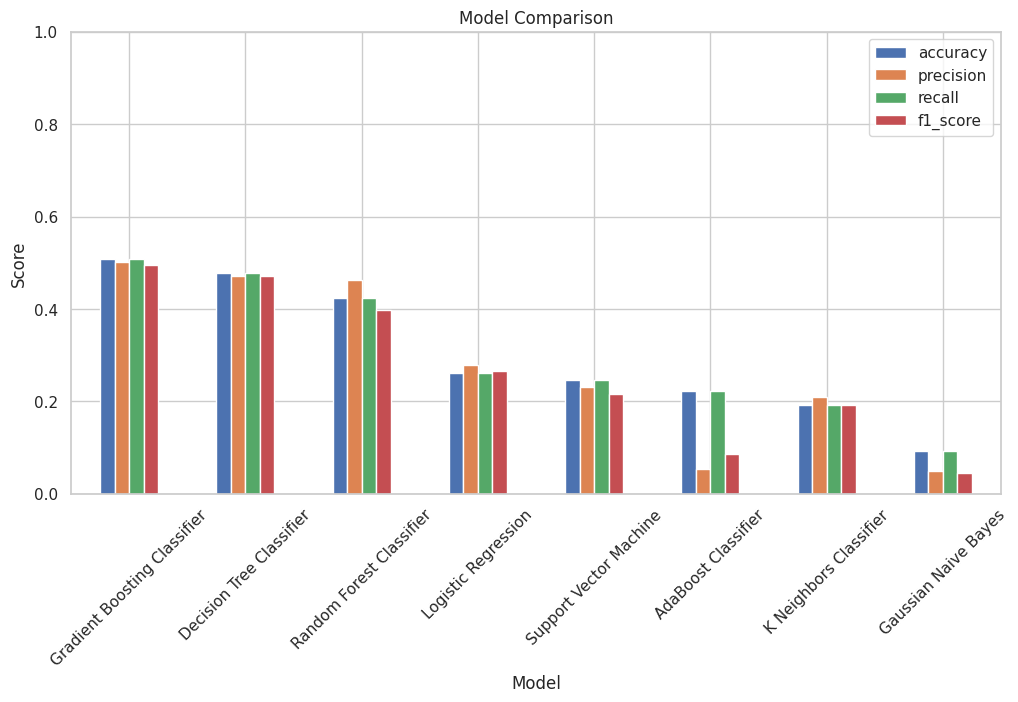

In [69]:
# Display the results
analyzer.display_results()

### D3: Feature Importances

For models that provide feature importances (e.g., Decision Tree, Random Forest, Gradient Boosting), we can plot these importances to understand which features contribute most to the predictions.

**Explanation**:
- **Feature Importances**: Quantifies the contribution of each feature to the model's predictions.
- **Plotting**: Visualizes the importance of each feature, helping in understanding the model's decision-making process.

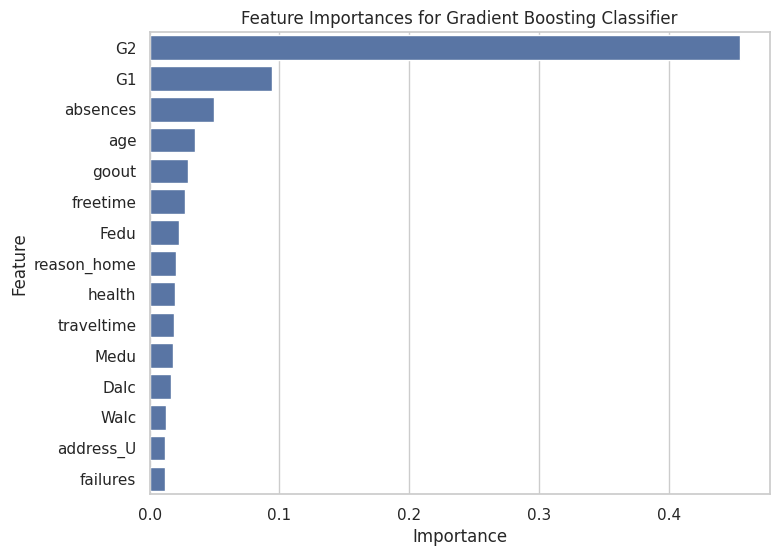

In [70]:
# Plot feature importances for the Gradient Boosting Classifier
analyzer.plot_feature_importances('Gradient Boosting Classifier', 15)

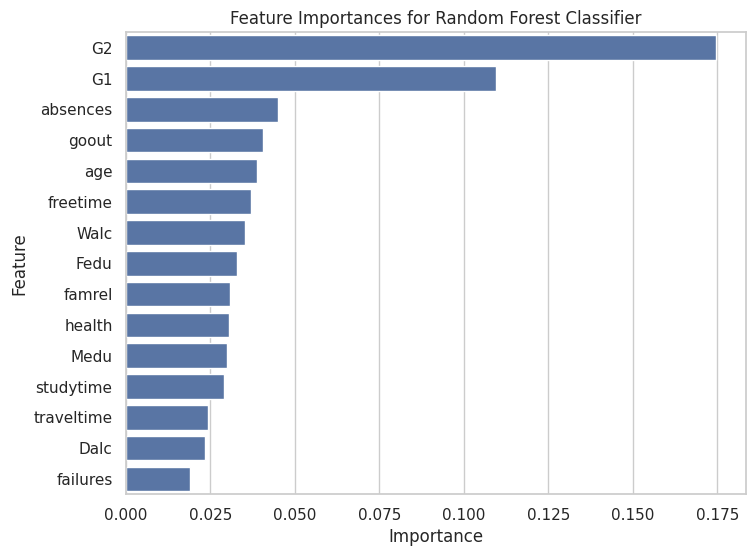

In [71]:
# Important features for Random Forest Classifier
analyzer.plot_feature_importances('Random Forest Classifier', 15)

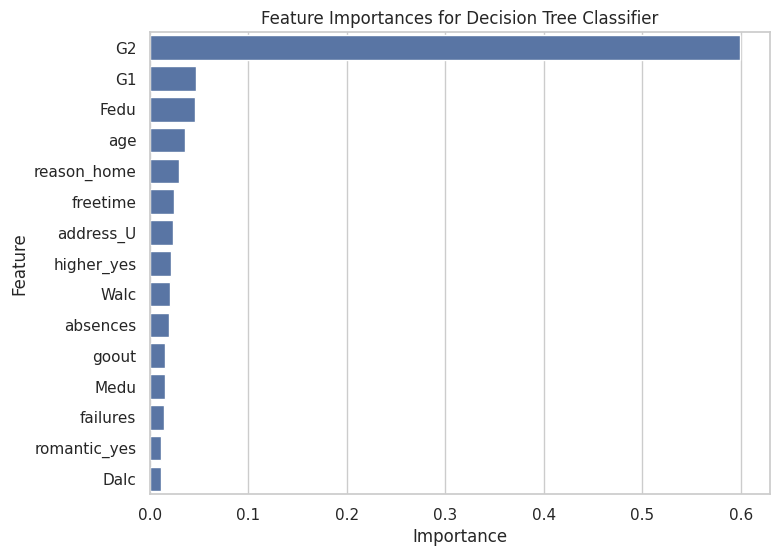

In [72]:
# Important features for Decision Tree Classifier
analyzer.plot_feature_importances('Decision Tree Classifier', 15)

## E) Conclusion

In this analysis, we explored various machine learning models to predict the final grades (G3) of students based on their academic and personal attributes. Here are the key findings and conclusions from our study:

### E1: Model Performance

1. **Gradient Boosting Classifier**:
   - Achieved the highest accuracy (0.515385) among all models.
   - Precision, recall, and F1 score are also relatively high, indicating a balanced performance.

2. **Random Forest Classifier**:
   - Performed moderately well with an accuracy of 0.446154.
   - Precision and recall are slightly lower than the Gradient Boosting Classifier but still provide reasonable predictions.

3. **Decision Tree Classifier**:
   - Showed a lower accuracy (0.384615) compared to ensemble methods but provides interpretability through its tree structure.

4. **Other Models**:
   - Logistic Regression, Support Vector Machine, AdaBoost, K Neighbors, and Gaussian Naive Bayes showed lower performance, indicating that they might not be well-suited for this particular dataset.

### E2: Feature Importance

1. **Gradient Boosting Classifier**:
   - The top features contributing to the predictions are G2 (second period grade), G1 (first period grade), absences, age, and free time after school.
   - G2 and G1 are the most influential features, highlighting the importance of continuous assessment in predicting final grades.

2. **Random Forest Classifier** and **Decision Tree Classifier**:
   - Similar top features were identified, emphasizing the importance of past academic performance (G1 and G2), student engagement (absences, freetime), and family background (Fedu, Medu).

### E3: Insights and Recommendations

1. **Importance of Continuous Assessment**:
   - The strong influence of G1 and G2 on the final grade (G3) suggests that continuous assessment throughout the academic year is crucial for predicting final outcomes. Schools should focus on regular assessments and provide feedback to help students improve progressively.

2. **Attendance and Engagement**:
   - Absences and free time are significant predictors of student performance. Encouraging regular attendance and engagement in school activities can positively impact academic outcomes. Schools might consider programs to reduce absenteeism and increase student participation.

3. **Family Background**:
   - Features like parental education (Fedu, Medu) play a role in student performance. Schools could engage with families and provide resources to support students from diverse backgrounds, ensuring equitable opportunities for academic success.

4. **Holistic Approach to Student Support**:
   - The model results suggest that a combination of academic performance, personal attributes, and family background contribute to student success. Schools should adopt a holistic approach, addressing academic, social, and emotional needs to foster overall student development.

### E4: Future Work

1. **Model Improvement**:
   - Further tuning of hyperparameters and exploring other advanced models like neural networks could potentially improve predictive performance.
   
2. **Feature Engineering**:
   - Additional features related to student behavior, extracurricular activities, and socio-economic factors could be included to enhance model accuracy.

3. **Data Collection**:
   - Collecting more granular data on student activities, teacher assessments, and peer interactions could provide deeper insights into factors affecting student performance.

## F) References

These references provide the necessary background and additional resources for further understanding and exploration of the student performance dataset and the related analyses.

1. **Project Repository**:
   - Student Performance Insights Project: [GitHub Repository](https://github.com/ksmooi/mscs_ml_student_performance)

2. **Machine Learning Course**:
  - Introduction to Machine Learning: Supervised Learning [CSCA 5622](https://www.colorado.edu/cs/academics/online-programs/mscs-coursera/csca5622)

3. **Dataset**:
   - Kaggle: [Student Performance Data Set](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/data)

4. **Additional Analysis**:
   - Kaggle Notebook: [Annual Grades Average 5-Level Classification](https://www.kaggle.com/code/sharonyaroshetsky/annual-grades-average-5-level-classification#Outliers-Detection)
